# Exploratory Data Analysis (EDA) example

Exploratory Data Analysis (EDA) is the process of examining and analyzing data sets to summarize their main characteristics and gain insights into the data. It involves using statistical and visualization techniques to understand the distribution of the data, identify patterns and trends, detect outliers and anomalies, and formulate hypotheses for further analysis.

Through this Exploratory Data Analysis we will understand, explore, and visualize the *CRIME INCIDENT REPORTS* datasets to extract insights and inform decision-making.

Disclaimer : The goal here is to provide overall data-driven insights but depending on the question asked it is possible to have a way more specific approach, orient the analysis and use other technical skills. 

Data source: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

---

In [ ]:
!pip install openpyxl #add in requirements

# Setup

__Importing libraries & modules__

In [1]:
import os # files management and OS interactions 
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import plotly.express as px # data visualization

__Architecture of the project on the computer__

In [2]:
!tree

.
├── EDA_notebook.ipynb
├── location_data
│   ├── tes2.geojson
│   └── test.geojson
└── raw_data
    ├── crime_2015.csv
    ├── crime_2016.csv
    ├── crime_2017.csv
    ├── crime_2018.csv
    ├── crime_2019.csv
    ├── crime_2020.csv
    ├── crime_2021.csv
    ├── crime_2022.csv
    └── crime_incident_field_explanation.xlsx

2 directories, 12 files


__Concatenating all the csv files in a single dataset__

In [3]:
# Define the path of the directory containing CSV files
directory = 'raw_data'

# Create an empty list to store the DataFrames
dfs = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

# Concatenate all the DataFrames into a single DataFrame
raw_dataset = pd.concat(dfs)

/var/folders/96/qwz6k4cs5djddvdx5thblzl40000gn/T/ipykernel_3301/700010255.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/96/qwz6k4cs5djddvdx5thblzl40000gn/T/ipykernel_3301/700010255.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/96/qwz6k4cs5djddvdx5thblzl40000gn/T/ipykernel_3301/700010255.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/var/folders/96/qwz6k4cs5djddvdx5thblzl40000gn/T/ipykernel_3301/700010255.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


__Reading the xlsx files to help us understanding the dataset__

In [5]:
crime_incident_field_explanation = pd.read_excel("raw_data/crime_incident_field_explanation.xlsx")

# Data Overview

__Field explanation of the dataset__

In [6]:
crime_incident_field_explanation

Field Name, Data Type, Required  \
0             [incident_num] [varchar](20) NOT NULL,   
1                  [offense_code][varchar](25) NULL,   
2  [Offense_Code_Group_Description][varchar](80) ...   
3           [Offense_Description][varchar](80) NULL,   
4                     [district] [varchar](10) NULL,   
5               [reporting_area] [varchar](10) NULL,   
6                         [shooting][char] (1) NULL,   
7                 [occurred_on] [datetime2](7) NULL,   
8                     [UCR_Part] [varchar](25) NULL,   
9                       [street] [varchar](50) NULL,   

                                         Description  
0                         Internal BPD report number  
1              Numerical code of offense description  
2   Internal categorization of [offense_description]  
3                     Primary descriptor of incident  
4            What district the crime was reported in  
5  RA number associated with the where the crime ...  
6                   Indicated a shooting took place.  
7  Earliest date and time the incident could have...  
8     Universal Crime Reporting Part number (1,2, 3)  
9                Street name the incident took place

__Raw dataset__

In [7]:
raw_dataset.head() # 5 first lines

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I172040657          2629          Harassment   
1      I182061268          3201       Property Lost   
2      I162013546          3201       Property Lost   
3      I152051083          3115  Investigate Person   
4      I152059178          2647               Other   

         OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                 HARASSMENT      C11            397      NaN   
1            PROPERTY - LOST      NaN                     NaN   
2            PROPERTY - LOST       B3            433      NaN   
3         INVESTIGATE PERSON       A7             20      NaN   
4  THREATS TO DO BODILY HARM      C11            359      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2015-06-15 00:00:00  2015      6      Monday     0    Part Two   
1  2015-06-15 00:00:00  2015      6      Monday     0  Part Three   
2  2015-06-15 00:00:00  2015      6      Monday     0  Part Three   
3  2015-06-15 00:00:00  2015      6      Monday     0  Part Three   
4  2015-06-15 00:00:00  2015      6      Monday     0    Part Two   

          STREET        Lat       Long                     Location  
0   MELBOURNE ST  42.291093 -71.065945  (42.29109287, -71.06594539)  
1        BERNARD        NaN        NaN                          NaN  
2     NORFOLK ST  42.283634 -71.082813  (42.28363434, -71.08281320)  
3       PARIS ST  42.377023 -71.032247  (42.37702319, -71.03224730)  
4  WASHINGTON ST  42.293606 -71.071887  (42.29360585, -71.07188650)

In [8]:
raw_dataset.shape # numbers of rows and columns

(656904, 17)

In [9]:
raw_dataset.dtypes # columns names and their data type

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [10]:
raw_dataset.duplicated().sum() # numbers of duplicated rows 

643

In [11]:
# Percentage of missing values in each column sorted in descending order
((raw_dataset.isnull().sum()/len(raw_dataset))*100).sort_values(ascending=False)

SHOOTING               53.553944
UCR_PART               46.239329
OFFENSE_CODE_GROUP     46.224562
Location                5.373388
Long                    5.373388
Lat                     5.373388
STREET                  1.809701
DISTRICT                0.656108
DAY_OF_WEEK             0.000000
HOUR                    0.000000
INCIDENT_NUMBER         0.000000
MONTH                   0.000000
OFFENSE_CODE            0.000000
OCCURRED_ON_DATE        0.000000
REPORTING_AREA          0.000000
OFFENSE_DESCRIPTION     0.000000
YEAR                    0.000000
dtype: float64

#  __Data cleaning__

- __Capitalizing all column names__ (easier for syntax)
- __Dropping the duplicated rows__
- __Dropping the rows with missing values in LAT, LON, DISTRICT and STREET columns__ (< 8%)
- __Dropping the OCCURED_ON_DATE, OFFENSE_DESCRIPTION and OFFENSE_CODE columns__ (useless/hard to use)


In [12]:
raw_dataset.columns = [col_name.upper() for col_name in list(raw_dataset.columns)]
raw_dataset.drop_duplicates(inplace = True)
raw_dataset.dropna(subset=['LAT', 'LONG', 'DISTRICT', "STREET"], inplace= True)
raw_dataset.drop(columns=["OCCURRED_ON_DATE", "OFFENSE_DESCRIPTION", "OFFENSE_CODE"],
                 inplace = True)

- __Inspecting the REPORTING_AREA column__

In [13]:
raw_dataset.groupby("REPORTING_AREA").count().INCIDENT_NUMBER.sort_values(ascending=False).head()
# Lots of values are empty but we keep it for the moment
# If we decide to analyze REPORTING_AREA data, we'll drop the empty rows

REPORTING_AREA
       72126
355     9959
167     7004
465     6818
282     6331
Name: INCIDENT_NUMBER, dtype: int64

- __Evolution of missing values of SHOOTING, UCR_PART and OFFENSE_CODE_GROUP columns__

In [14]:
raw_dataset.groupby("YEAR").count()[['SHOOTING', 'UCR_PART', 'OFFENSE_CODE_GROUP']]
# Boston Police Department changed their record system in 2019
# We keep UCR_PART and OFFENSE_CODE_GROUP for the moment
# If we decide to analyze these columns, we'll drop the empty rows

SHOOTING  UCR_PART  OFFENSE_CODE_GROUP
YEAR                                        
2015       178     51227               51228
2016       269     91543               91577
2017       359     93212               93251
2018       302     91321               91340
2019     82967         0                   0
2020     68928         0                   0
2021     67345         0                   0
2022     70007         0                   0

- __Inspecting and cleaning SHOOTING column__

In [15]:
raw_dataset[raw_dataset["YEAR"]<=2018].SHOOTING.unique()

array([nan, 'Y'], dtype=object)

In [16]:
raw_dataset[raw_dataset["YEAR"]>2018].SHOOTING.unique()

array([0, 1], dtype=object)

In [17]:
# Before 2019, nan values were meaning "no shooting"
raw_dataset.SHOOTING.fillna(0, inplace = True)

# Before 2019, Y values were meaning "shooting"
raw_dataset.SHOOTING.replace("Y",1, inplace = True)

- __Checking the lenght of each year__

In [18]:
year = raw_dataset["YEAR"].unique()
for i in year : 
    print(f'Number of months in {i} year: ',raw_dataset[raw_dataset["YEAR"] == i].MONTH.nunique())
# 2015 is not complete but we keep it for the moment    
# If we decide to do a temporal analysis on YEAR column, we'll drop 2015

Number of months in 2015 year:  7
Number of months in 2016 year:  12
Number of months in 2017 year:  12
Number of months in 2019 year:  12
Number of months in 2018 year:  12
Number of months in 2020 year:  12
Number of months in 2021 year:  12
Number of months in 2022 year:  12


__Final dataset__

In [19]:
data_clean = raw_dataset
data_clean.shape

(616643, 14)

# Crime types analysis

The Uniform Crime Reporting (UCR) Program divides offenses into groups, in its Summary Reporting System. Those belonging to Part I are the most serious. More info: https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/topic-pages/offense-definitions

In [20]:
data_clean_before_2019 = data_clean[data_clean["YEAR"] < 2019]
# UCR PART and OFFENSE_CODE_GROUP data are only available before 2019

In [21]:
shooting_data = data_clean_before_2019[data_clean_before_2019["SHOOTING"] == 1]
# dataset containing only crimes with shooting

## __Number of crimes per UCR part__

In [91]:
top_crimes_per_ucr_part = pd.DataFrame(data_clean_before_2019.groupby("UCR_PART")\
                            .count()["INCIDENT_NUMBER"]\
                            .reset_index()
                            .sort_values(by = "INCIDENT_NUMBER", ascending=False))
top_crimes_per_ucr_part

UCR_PART  INCIDENT_NUMBER
2  Part Three           161816
3    Part Two            99680
1    Part One            64528
0       Other             1279

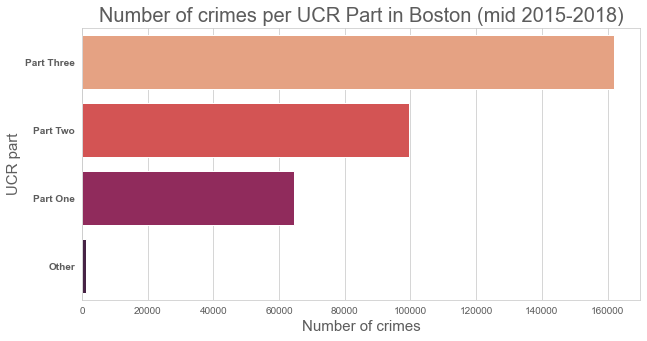

In [92]:
#Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "INCIDENT_NUMBER",
            y="UCR_PART",
            data = top_crimes_per_ucr_part,
            palette = 'rocket_r')

ax.set_title("Number of crimes per UCR Part in Boston (mid 2015-2018)", fontsize=20, alpha=.75 )
ax.set_ylabel("UCR part", fontsize=15, alpha=.75)
ax.set_xlabel("Number of crimes", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

## __Number of crimes per offense group__

In [24]:
top_10_crimes = pd.DataFrame(data_clean_before_2019.groupby("OFFENSE_CODE_GROUP")\
                            .count()["INCIDENT_NUMBER"]\
                            .reset_index()\
                            .sort_values(by = "INCIDENT_NUMBER", ascending=False))\
                            .head(10)

top_10_crimes

OFFENSE_CODE_GROUP  INCIDENT_NUMBER
43  Motor Vehicle Accident Response            33490
34                          Larceny            27896
40               Medical Assistance            24875
31               Investigate Person            19532
46                            Other            18633
61                   Simple Assault            16405
63                        Vandalism            16219
15                   Drug Violation            15774
64                  Verbal Disputes            14287
62                            Towed            11817

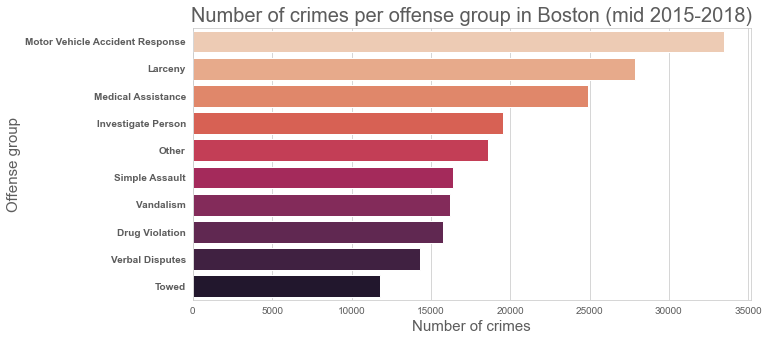

In [63]:
#Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "INCIDENT_NUMBER",
            y="OFFENSE_CODE_GROUP",
            data = top_10_crimes,
            palette = 'rocket_r')

ax.set_title("Number of crimes per offense group in Boston (mid 2015-2018)", fontsize=20, alpha=.75 )
ax.set_ylabel("Offense group", fontsize=15, alpha=.75)
ax.set_xlabel("Number of crimes", fontsize=15, alpha=.75)

plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

## __Number of crimes with shooting per offense group__


In [26]:
top_10_crimes_shooting = pd.DataFrame(shooting_data.groupby("OFFENSE_CODE_GROUP")\
                                     .count()["INCIDENT_NUMBER"]\
                                     .reset_index()\
                                     .sort_values(by = "INCIDENT_NUMBER", ascending=False))\
                                     .head(10)
top_10_crimes_shooting

OFFENSE_CODE_GROUP  INCIDENT_NUMBER
0   Aggravated Assault              551
7             Homicide              132
26     Warrant Arrests               88
5   Firearm Violations               83
1           Ballistics               47
21     Search Warrants               36
3       Drug Violation               31
20             Robbery               22
11  Medical Assistance               20
24           Vandalism               19

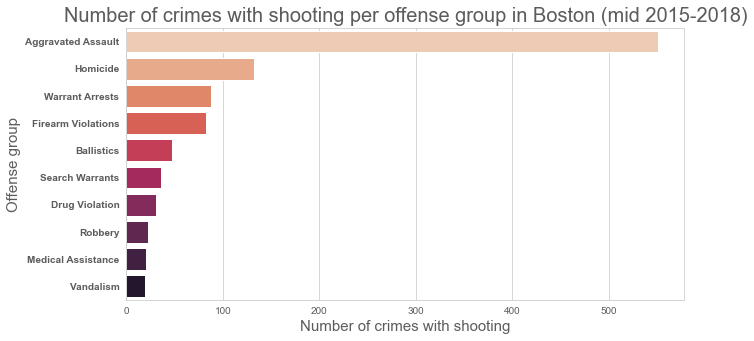

In [97]:
# Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "INCIDENT_NUMBER",
            y="OFFENSE_CODE_GROUP",
            data = top_10_crimes_shooting,
            palette = 'rocket_r')

ax.set_title("Number of crimes with shooting per offense group in Boston (mid 2015-2018)", fontsize=20, alpha=.75 )
ax.set_ylabel("Offense group", fontsize=15, alpha=.75)
ax.set_xlabel("Number of crimes with shooting", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

## Number of UCR Part I (most serious) crimes per offense group


In [123]:
crimes_ucr_part_one = data_clean_before_2019[data_clean_before_2019["UCR_PART"] == "Part One"]\
                    .groupby("OFFENSE_CODE_GROUP")\
                    .count()[["INCIDENT_NUMBER"]]\
                    .reset_index()\
                    .sort_values(by="INCIDENT_NUMBER", ascending=False)

crimes_ucr_part_one

OFFENSE_CODE_GROUP  INCIDENT_NUMBER
4                     Larceny            27896
5  Larceny From Motor Vehicle            11209
0          Aggravated Assault             7936
7        Residential Burglary             6003
1                  Auto Theft             4856
8                     Robbery             4547
2         Commercial Burglary             1419
6              Other Burglary              492
3                    Homicide              170

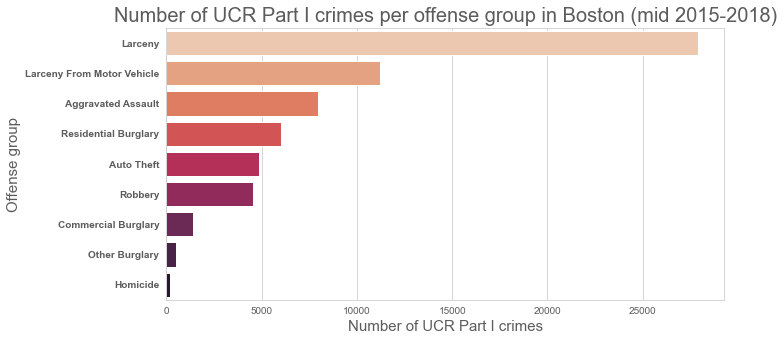

In [124]:
# Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "INCIDENT_NUMBER",
            y="OFFENSE_CODE_GROUP",
            data = crimes_ucr_part_one,
            palette = 'rocket_r')

ax.set_title("Number of UCR Part I crimes per offense group in Boston (mid 2015-2018)", fontsize=20, alpha=.75 )
ax.set_ylabel("Offense group", fontsize=15, alpha=.75)
ax.set_xlabel("Number of UCR Part I crimes", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

# Temporal analysis of crimes

## __Number of crimes per hour__ 

In [68]:
crimes_hours = data_clean.groupby("HOUR").count()\
                            [["INCIDENT_NUMBER"]].reset_index()
crimes_hours

HOUR  INCIDENT_NUMBER
0      0            34727
1      1            16798
2      2            14084
3      3             8743
4      4             6593
5      5             6648
6      6             9513
7      7            17028
8      8            25083
9      9            28495
10    10            31611
11    11            32057
12    12            37148
13    13            32772
14    14            33394
15    15            32024
16    16            38396
17    17            39066
18    18            37557
19    19            33206
20    20            30292
21    21            27077
22    22            24526
23    23            19805

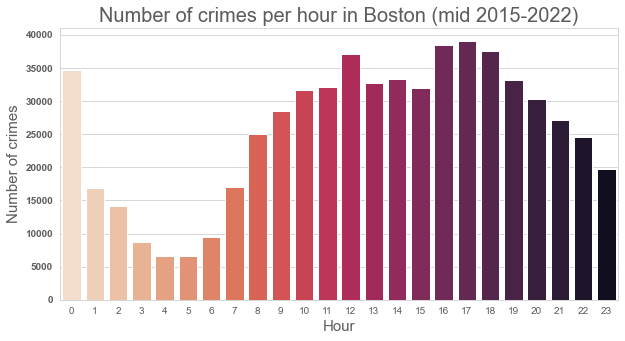

In [96]:
# Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "HOUR",
            y="INCIDENT_NUMBER",
            data = crimes_hours,
            palette = 'rocket_r')

ax.set_title("Number of crimes per hour in Boston (mid 2015-2022)", fontsize=20, alpha=.75 )
ax.set_ylabel("Number of crimes", fontsize=15, alpha=.75)
ax.set_xlabel("Hour", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

## __Number of crimes per day__ 

In [29]:
crimes_day_of_week = data_clean.groupby("DAY_OF_WEEK").count()\
                            [["INCIDENT_NUMBER"]].reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

crimes_day_of_week['DAY_OF_WEEK'] = pd.Categorical(crimes_day_of_week['DAY_OF_WEEK'], 
                                                   categories=day_order, 
                                                   ordered=True)
crimes_day_of_week

DAY_OF_WEEK  INCIDENT_NUMBER
0      Friday            93933
1      Monday            88815
2    Saturday            86792
3      Sunday            78258
4    Thursday            89785
5     Tuesday            88689
6   Wednesday            90371

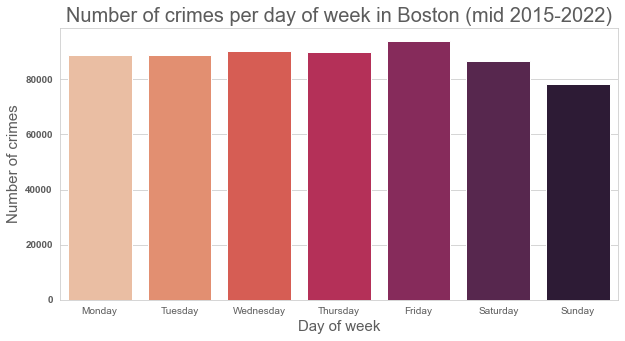

In [99]:
# Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "DAY_OF_WEEK",
            y="INCIDENT_NUMBER",
            data = crimes_day_of_week,
            palette = 'rocket_r')

ax.set_title("Number of crimes per day of week in Boston (mid 2015-2022)", fontsize=20, alpha=.75 )
ax.set_ylabel("Number of crimes", fontsize=15, alpha=.75)
ax.set_xlabel("Day of week", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

## __Number of crimes per month__ 

In [31]:
data_clean_after_2015 = data_clean[data_clean["YEAR"] > 2015]
# We drop 2015 because it's not a complete year

In [32]:
crimes_months_without_2015 = data_clean_after_2015.groupby("MONTH").count()\
                            [["INCIDENT_NUMBER"]].reset_index()
crimes_months_without_2015

MONTH  INCIDENT_NUMBER
0       1            45348
1       2            41583
2       3            45817
3       4            44569
4       5            48188
5       6            49782
6       7            50352
7       8            51706
8       9            50056
9      10            49350
10     11            44999
11     12            43665

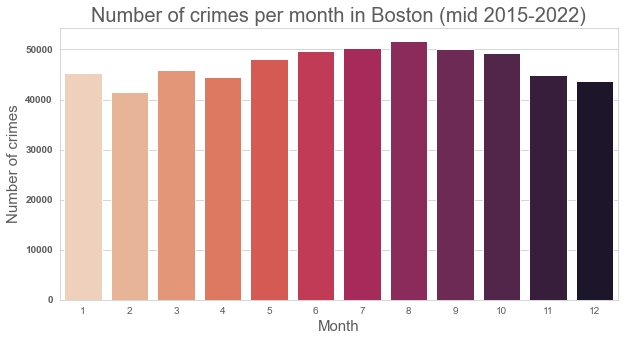

In [100]:
# Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "MONTH",
            y="INCIDENT_NUMBER",
            data = crimes_months_without_2015,
            palette = 'rocket_r')

ax.set_title("Number of crimes per month in Boston (mid 2015-2022)", fontsize=20, alpha=.75 )
ax.set_ylabel("Number of crimes", fontsize=15, alpha=.75)
ax.set_xlabel("Month", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

## __Number of crimes per year__ 

In [71]:
crimes_years = data_clean_after_2015.groupby("YEAR").count()\
                            [["INCIDENT_NUMBER"]].reset_index()
crimes_years

YEAR  INCIDENT_NUMBER
0  2016            91577
1  2017            93251
2  2018            91340
3  2019            82967
4  2020            68928
5  2021            67345
6  2022            70007

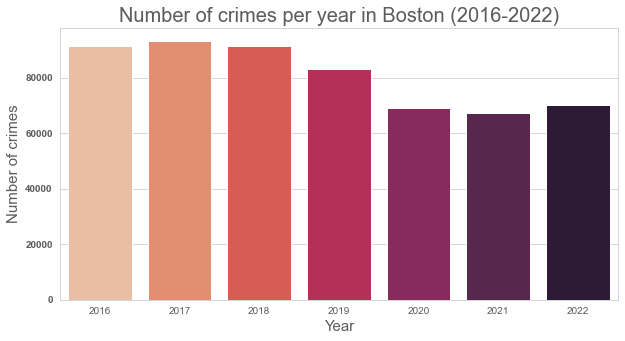

In [101]:
# Plot 

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "YEAR",
            y="INCIDENT_NUMBER",
            data = crimes_years,
            palette = 'rocket_r')

ax.set_title("Number of crimes per year in Boston (2016-2022)", fontsize=20, alpha=.75 )
ax.set_ylabel("Number of crimes", fontsize=15, alpha=.75)
ax.set_xlabel("Year", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

# Geographical analysis

## __Ranking of districts per number of crimes__

In [93]:
district_incident_number = pd.DataFrame(data_clean.groupby("DISTRICT")\
                                        .count()["INCIDENT_NUMBER"]\
                                        .reset_index()\
                                        .sort_values(by = "INCIDENT_NUMBER", ascending=False))
district_incident_number

DISTRICT  INCIDENT_NUMBER
3         B2            93815
5        C11            83121
8         D4            79538
4         B3            68642
0         A1            65221
6         C6            45878
7        D14            41794
10       E18            35299
9        E13            34912
11        E5            28181
2         A7            26855
1        A15            12973
12  External              414

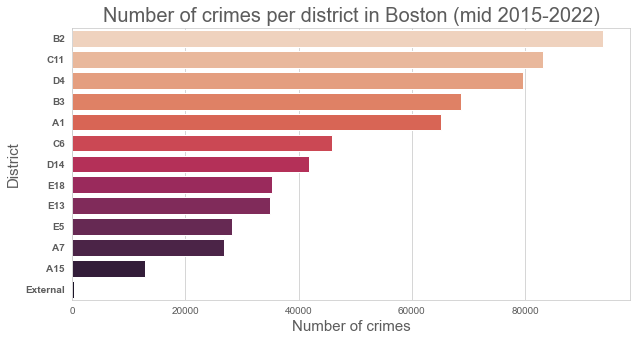

In [117]:
# Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "INCIDENT_NUMBER",
            y="DISTRICT",
            data = district_incident_number,
            palette = 'rocket_r')

ax.set_title("Number of crimes per district in Boston (mid 2015-2022)", fontsize=20, alpha=.75 )
ax.set_ylabel("District", fontsize=15, alpha=.75)
ax.set_xlabel("Number of crimes", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

## Ranking of streets per number of crimes

In [156]:
top_10_street_incident_number = pd.DataFrame(data_clean.groupby("STREET")\
                                        .count()["INCIDENT_NUMBER"]\
                                        .reset_index()\
                                        .sort_values(by = "INCIDENT_NUMBER", ascending=False)\
                                        .head(10)
                                     )
top_10_street_incident_number

STREET  INCIDENT_NUMBER
13422      WASHINGTON ST            33790
2000       BLUE HILL AVE            15350
2383         BOYLSTON ST            12197
6824        HARRISON AVE            11321
3126           CENTRE ST             9975
12643         TREMONT ST             9301
4722      DORCHESTER AVE             9186
8758   MASSACHUSETTS AVE             8678
7497       HYDE PARK AVE             8104
3871    COMMONWEALTH AVE             7710

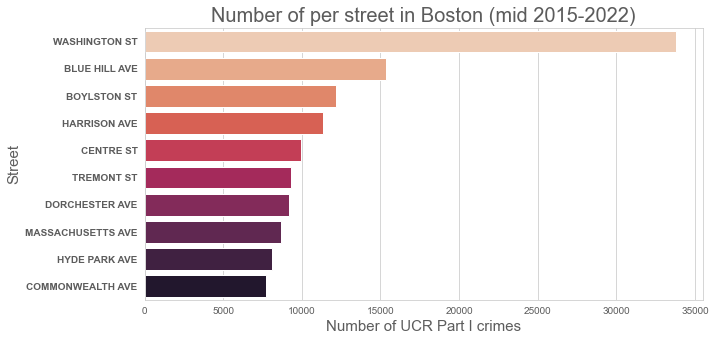

In [158]:
# Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "INCIDENT_NUMBER",
            y="STREET",
            data = top_10_street_incident_number,
            palette = 'rocket_r')

ax.set_title("Number of per street in Boston (mid 2015-2022)", fontsize=20, alpha=.75 )
ax.set_ylabel("Street", fontsize=15, alpha=.75)
ax.set_xlabel("Number of UCR Part I crimes", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

## Ranking of districts per number of UCR Part 1 (most serious) crimes

In [120]:
district_part_one_crimes = data_clean_before_2019[data_clean_before_2019["UCR_PART"] == "Part One"]\
                                .groupby(by = "DISTRICT")\
                                .count()[["INCIDENT_NUMBER"]]\
                                .reset_index()\
                                .sort_values(by = "INCIDENT_NUMBER", ascending = False)
district_part_one_crimes

DISTRICT  INCIDENT_NUMBER
8        D4            12711
3        B2             9224
0        A1             8627
5       C11             7269
4        B3             5389
6        C6             4702
7       D14             4200
9       E13             3854
10      E18             2758
2        A7             2256
11       E5             2233
1       A15             1305

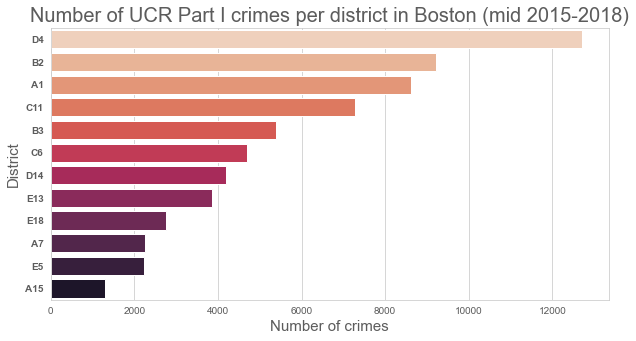

In [122]:
# Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "INCIDENT_NUMBER",
            y="DISTRICT",
            data = district_part_one_crimes,
            palette = 'rocket_r')

ax.set_title("Number of UCR Part I crimes per district in Boston (mid 2015-2018)", fontsize=20, alpha=.75 )
ax.set_ylabel("District", fontsize=15, alpha=.75)
ax.set_xlabel("Number of crimes", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

## Ranking of streets per number of UCR Part 1 (most serious) crimes

In [153]:
top_10_street_part_one_crime = data_clean_before_2019[data_clean_before_2019["UCR_PART"] == "Part One"]\
                .groupby("STREET")\
                .count()[['INCIDENT_NUMBER']]\
                .reset_index()\
                .sort_values(by = "INCIDENT_NUMBER", ascending = False)\
                .head(10)

top_10_street_part_one_crime

STREET  INCIDENT_NUMBER
2901      WASHINGTON ST             3422
334         BOYLSTON ST             2954
299       BLUE HILL AVE             1443
1485     HUNTINGTON AVE             1222
2758         TREMONT ST             1161
2036         NEWBURY ST             1159
1823  MASSACHUSETTS AVE             1138
836      DORCHESTER AVE             1099
645    COMMONWEALTH AVE             1017
1337       HARRISON AVE              926

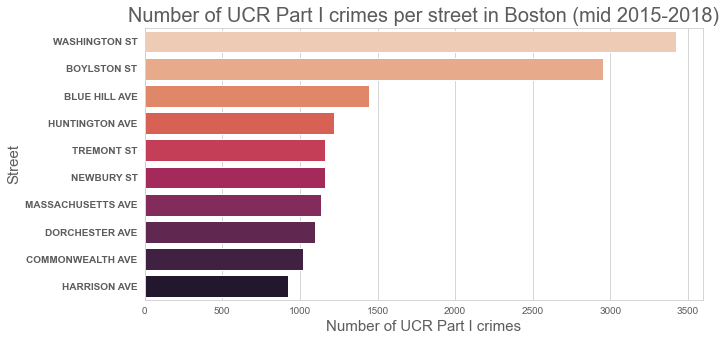

In [154]:
# Plot

sns.set_style('whitegrid')

ax,fig = plt.subplots(figsize=(10,5))

ax = sns.barplot(x= "INCIDENT_NUMBER",
            y="STREET",
            data = top_10_street_part_one_crime,
            palette = 'rocket_r')

ax.set_title("Number of UCR Part I crimes per street in Boston (mid 2015-2018)", fontsize=20, alpha=.75 )
ax.set_ylabel("Street", fontsize=15, alpha=.75)
ax.set_xlabel("Number of UCR Part I crimes", fontsize=15, alpha=.75)
plt.yticks(alpha=0.75,weight="bold")
plt.xticks(alpha=0.75)
plt.show()

## Insights of the analysis

GRAVITE / QUANTITE



# Map

In [38]:
import folium
from folium.plugins import HeatMap

In [39]:
data_clean[data_clean["DISTRICT"] == "B2"][["LAT","LONG"]]

LAT       LONG
5      42.328663 -71.085634
16     42.317439 -71.075478
37     42.312506 -71.083147
42     42.328663 -71.085634
51     42.315031 -71.083440
...          ...        ...
73784  42.315877 -71.085109
73789  42.308970 -71.082848
73806  42.310269 -71.089311
73831  42.334873 -71.085046
73837  42.318132 -71.074706

[93815 rows x 2 columns]

In [40]:
vand2 = data_clean[data_clean["DISTRICT"] == "B2"][["LAT","LONG"]]

In [41]:
vand2

LAT       LONG
5      42.328663 -71.085634
16     42.317439 -71.075478
37     42.312506 -71.083147
42     42.328663 -71.085634
51     42.315031 -71.083440
...          ...        ...
73784  42.315877 -71.085109
73789  42.308970 -71.082848
73806  42.310269 -71.089311
73831  42.334873 -71.085046
73837  42.318132 -71.074706

[93815 rows x 2 columns]

In [42]:
vand=data_clean[["LAT","LONG"]]

BostonMap=folium.Map(location=[42.356145,-71.064083],zoom_start=11)
HeatMap(data=vand2, radius=10).add_to(BostonMap)

BostonMap

# Test Map

In [43]:
data_clean[data_clean["UCR_PART"] == "Part One"]\
                    .groupby("OFFENSE_CODE_GROUP")\
                    .count()[["INCIDENT_NUMBER"]]\
                    .reset_index()\
                    .sort_values(by="INCIDENT_NUMBER", ascending=True)

OFFENSE_CODE_GROUP  INCIDENT_NUMBER
3                    Homicide              170
6              Other Burglary              492
2         Commercial Burglary             1419
8                     Robbery             4547
1                  Auto Theft             4856
7        Residential Burglary             6003
0          Aggravated Assault             7936
5  Larceny From Motor Vehicle            11209
4                     Larceny            27896

In [44]:
latlist= data_clean[data_clean["OFFENSE_CODE_GROUP"] == "Homicide"]["LAT"].to_list()
longlist= data_clean[data_clean["OFFENSE_CODE_GROUP"] == "Homicide"]["LONG"].to_list()

In [45]:
import json

In [46]:
BostonMap=folium.Map(location=[42.356145,-71.064083],zoom_start=11)

# Title 

loc = 'Crimes in Boston'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

BostonMap.get_root().html.add_child(folium.Element(title_html))

# charger les données GeoJSON de la frontière de l'état de Boston
with open('location_data/tes2.geojson') as f:
    geojson_data = json.load(f)

# ajouter une couche GeoJSON pour les contours de l'état de Boston
fg = folium.FeatureGroup("Police stations")
fg.add_child(folium.GeoJson(geojson_data)).add_to(BostonMap)

# charger les données GeoJSON de la frontière de l'état de Boston
with open('location_data/test.geojson') as f:
    geojson_data = json.load(f)

# ajouter une couche GeoJSON pour les contours de l'état de Boston
fg = folium.FeatureGroup("Districts")
fg.add_child(folium.GeoJson(geojson_data)).add_to(BostonMap)

# Markers

feature_group = folium.FeatureGroup("Homicide")
for lat, lng in zip(latlist, longlist):
    feature_group.add_child(folium.Circle(radius = 10,
                                          location=[lat,lng], 
                                          fill = True, 
                                          fill_opacity=1, 
                                          color= "black")).add_to(BostonMap)
    
#from folium.features import DivIcon

#folium.map.Marker(
#    [42.356145,-71.064083],
#    icon=DivIcon(
#        icon_size=(250,36),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 20pt">Toto is my name</div>',
#        )
#    ).add_to(BostonMap)   

# Layer Control

folium.LayerControl(position='topright',
                    collapsed=False).add_to(BostonMap)

# Print

BostonMap
#BostonMap.save('map-with-title.html')


In [47]:
#BostonMap.save('map-with-title.html')


In [48]:
data_clean.groupby("STREET").count()[["INCIDENT_NUMBER"]].sort_values(by = "INCIDENT_NUMBER", ascending= False).head(20)

INCIDENT_NUMBER
STREET                            
WASHINGTON ST                33790
BLUE HILL AVE                15350
BOYLSTON ST                  12197
HARRISON AVE                 11321
CENTRE ST                     9975
TREMONT ST                    9301
DORCHESTER AVE                9186
MASSACHUSETTS AVE             8678
HYDE PARK AVE                 8104
COMMONWEALTH AVE              7710
GIBSON ST                     6024
RIVER ST                      5840
HUNTINGTON AVE                5709
COLUMBIA RD                   5539
W BROADWAY                    4764
DUDLEY ST                     4182
WARREN ST                     4141
NEWBURY ST                    3848
COLUMBUS AVE                  3842
ADAMS ST                      3404

In [49]:
import plotly.express as px
import pandas as pd 

In [50]:
px.set_mapbox_access_token("pk.eyJ1IjoiZmxhdmt2IiwiYSI6ImNsZ2NlOWU5cDBsZmYzZXA1eXNuMjhvODgifQ.QlhkZbILH0T-4jsv1Yv74w")

boston_lat = 42.3601
boston_lon = -71.0589

fig = px.scatter_mapbox(df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Event", 
                        center = {"lat": boston_lat, "lon": boston_lon},
                        zoom=10)

# charger les données GeoJSON de la frontière de l'état de Boston
with open('tes2.geojson') as f:
    geojson_data = json.load(f)

fig.add_choroplethmapbox(geojson=geojson_data,
                         #locations='nom_des_emplacements',
                         #featureidkey='properties.nom_des_emplacements',
                         #color='valeur_à_cartographier', 
                         #color_continuous_scale='blues',
                         #opacity=0.5)
                        )
                    
    
fig.show()

ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'] but received: Event

In [ ]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
geojson_data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un dataset
x = ['A', 'B', 'C', 'D']
y = [10, 20, 30, 40]
data = {'x': x, 'y': y}

# Créer un plot de type bar plot avec seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='x', y='y', data=data)

# Ajouter les étiquettes de chaque barre
for i in range(len(x)):
    plt.annotate(str(y[i]), xy=(i, y[i]), ha='center', va='bottom')

# Afficher le plot
plt.show()